# Dive Prediction - Results

*Predicting Seabird Diving Behaviour from GPS data*

This notebook presents results of different algorithms for dive prediction based on a dataset of **74 foraging trips of seabirds** (*Sula Variegata*) with both GPS and Time Depth Recorder (TDR) tracking data. Data has been collected on **Ilha Pescadores, Peru** between 2009 and 2013.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# roc results

In [2]:
roc_ftp = pd.read_csv('./results/roc_ftp.csv')
roc_network_timeseries = pd.read_csv('./results/roc_network_timeseries.csv')
roc_simple_network_matrix = pd.read_csv('./results/roc_simple_network_matrix.csv')
roc_deep_network_matrix = pd.read_csv('./results/roc_deep_network_matrix.csv')
roc_hmm = pd.read_csv('./results/roc_hmm.csv')
roc_new = pd.read_csv('./results/roc_deep_new_network.csv')

In [3]:
roc = pd.concat([ roc_deep_network_matrix, roc_new, roc_hmm ])


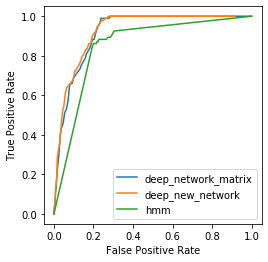

In [4]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

for model in roc.model.unique():
    curve = roc.loc[roc.model == model,('FP', 'TP')]
    plt.plot(np.array(curve.FP), np.array(curve.TP), label = model)
    
plt.legend()

# maps

In [11]:
data_test = pd.read_csv('./data/data_test.csv')

In [12]:
prob_ftp = pd.read_csv('./results/prob_ftp.csv')
prob_network_timeseries = pd.read_csv('./results/prob_network_timeseries.csv')
prob_simple_network_matrix = pd.read_csv('./results/prob_simple_network_matrix.csv')
prob_deep_network_matrix = pd.read_csv('./results/prob_deep_network_matrix.csv')
prob_hmm = pd.read_csv('./results/prob_hmm.csv')

In [45]:
prob_hmm.trip.unique()

array(['P1108_46_SV_T2', 'P1111_41_SV_T4', 'P1112_10_SV_T2',
       'P1112_15_SV_T3', 'P1112_20_SV_T4', 'P1112_31_SV_T5',
       'P1113_28_SV_T1'], dtype=object)

In [48]:
hmm

,model,trip,real,p
766,hmm,P1112_10_SV_T2,0,0.999760
767,hmm,P1112_10_SV_T2,0,0.027232
768,hmm,P1112_10_SV_T2,0,0.000080
769,hmm,P1112_10_SV_T2,0,0.000040
770,hmm,P1112_10_SV_T2,0,0.000027
...,...,...,...,...
1080,hmm,P1112_10_SV_T2,0,0.001052
1081,hmm,P1112_10_SV_T2,0,0.204777
1082,hmm,P1112_10_SV_T2,0,0.000741
1083,hmm,P1112_10_SV_T2,0,0.428428


In [143]:
i = data_test.trip.unique()[6]
rescale = 10


t = data_test[data_test.trip == i].copy() 
t = t.drop(t.tail(len(t)%rescale ).index)
    
hmm = prob_hmm[prob_hmm.trip == i].copy()
deep_network = prob_deep_network_matrix[prob_deep_network_matrix.trip == i].copy()

dive_hmm = np.array([hmm.p[i]  for i in hmm.index for k in range(rescale) ])
dive_deep_network = np.array([deep_network.p[i]  for i in deep_network.index for k in range(rescale) ])

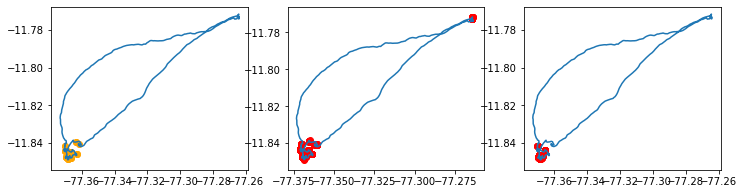

In [147]:
plt.figure(figsize= (12, 3))
plt.subplot(1, 3, 1)
plt.plot(np.array(t.lon), np.array(t.lat))
plt.scatter(t.lon[t.dive == 1], t.lat[t.dive == 1], c = 'orange')

plt.subplot(1, 3, 2)
plt.plot(np.array(t.lon), np.array(t.lat))
plt.scatter(t.lon[dive_hmm == 1], t.lat[dive_hmm  == 1], c = 'red')

plt.subplot(1, 3, 3)
plt.plot(np.array(t.lon), np.array(t.lat))
plt.scatter(t.lon[dive_deep_network  >= 0.85], t.lat[dive_deep_network >= 0.85], c = 'red')

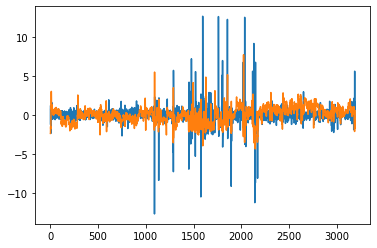

In [71]:
plt.plot((np.array(t.step_direction)-np.mean(t.step_direction))/np.std(t.step_direction))
plt.plot((np.array(t.step_speed)-np.mean(t.step_speed))/np.std(t.step_speed))

In [58]:
dive_deep_network

array([0.16576249, 0.16576249, 0.16576249, ..., 0.66546101, 0.66546101,
       0.66546101])